<a href="https://colab.research.google.com/github/Saketh-11653883/UNT-SAKETH_INFO5731/blob/main/INFO5731_Exercise_4_sakethkaveti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


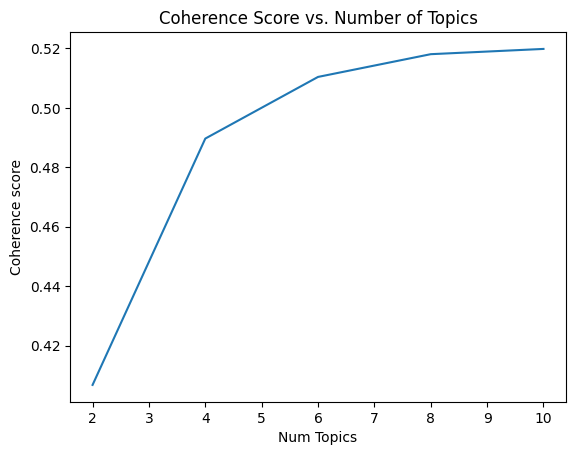

Optimal number of topics: 10
Topics:
(0, '0.033*"trade" + 0.033*"insid" + 0.033*"execut"')
(1, '0.110*"custom" + 0.110*"jeopard" + 0.110*"data"')
(2, '0.122*"execut" + 0.122*"sharehold" + 0.122*"compens"')
(3, '0.033*"insid" + 0.033*"regulatori" + 0.033*"key"')
(4, '0.073*"antitrust" + 0.073*"potenti" + 0.073*"author"')
(5, '0.033*"solvenc" + 0.033*"key" + 0.033*"compani"')
(6, '0.122*"compani" + 0.122*"financi" + 0.122*"concern"')
(7, '0.033*"trade" + 0.033*"insid" + 0.033*"violat"')
(8, '0.033*"key" + 0.033*"alleg" + 0.033*"trade"')
(9, '0.033*"solvenc" + 0.033*"law" + 0.033*"transpar"')


In [1]:
# Write your code here
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
from nltk.corpus import stopwords
from gensim.models.coherencemodel import CoherenceModel

# Download stopwords
nltk.download('stopwords')

# Initialize tokenizer, stop words, and stemmer
tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(stopwords.words('english'))
p_stemmer = PorterStemmer()

# Define sample documents
document_1 = "The company's financial statements raise concerns about its solvency."
document_2 = "Shareholders are demanding transparency regarding executive compensation."
document_3 = "The recent data breach has jeopardized customer trust in the organization."
document_4 = "There are allegations of insider trading against key executives."
document_5 = "The regulatory authorities are investigating potential violations of antitrust laws."

document_final = [document_1, document_2, document_3, document_4, document_5]

# Function to compute coherence values for different number of topics
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        model = models.ldamodel.LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

# Preprocess documents
texts = []
for doc in document_final:
    raw = doc.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [token for token in tokens if token not in en_stop]
    stemmed_tokens = [p_stemmer.stem(token) for token in stopped_tokens]
    texts.append(stemmed_tokens)

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Compute coherence values
model_list, coherence_values = compute_coherence_values(dictionary, corpus, texts, stop=12, start=2, step=2)

# Plot coherence values
import matplotlib.pyplot as plt
x = range(2, 12, 2)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

# Find the optimal number of topics
optimal_num_topics = x[coherence_values.index(max(coherence_values))]
print("Optimal number of topics:", optimal_num_topics)

# Train LDA model with optimal number of topics
lda_model = models.ldamodel.LdaModel(corpus, num_topics=optimal_num_topics, id2word=dictionary, passes=20)

# Print topics
print("Topics:")
for topic in lda_model.print_topics(num_words=3):
    print(topic)

## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


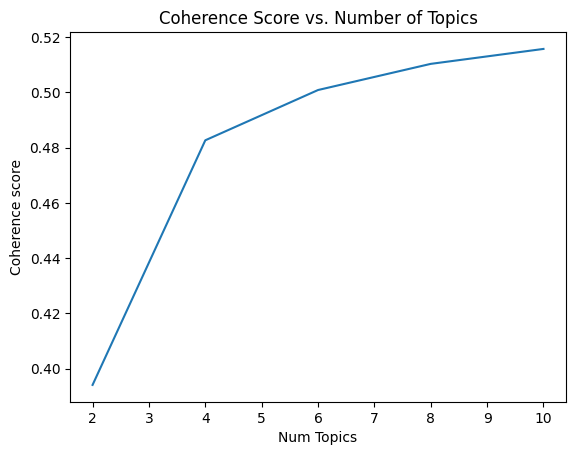

Optimal number of topics: 10
Topics:
[(0, '0.328*"organ" + 0.328*"trust" + 0.328*"jeopard"'), (1, '0.328*"violat" + 0.328*"law" + 0.328*"potenti"'), (2, '-0.535*"execut" + -0.331*"sharehold" + -0.331*"compens"'), (3, '0.408*"rais" + 0.408*"statement" + 0.408*"financi"'), (4, '-0.406*"trade" + -0.406*"insid" + -0.406*"key"')]


In [2]:
# Write your code here
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import matplotlib.pyplot as plt

# Download stopwords
nltk.download('stopwords')

# Initialize tokenizer, stop words, and stemmer
tokenizer = RegexpTokenizer(r'\w+')
en_stop = set(stopwords.words('english'))
p_stemmer = PorterStemmer()

# Define sample documents
document_1 = "The company's financial statements raise concerns about its solvency."
document_2 = "Shareholders are demanding transparency regarding executive compensation."
document_3 = "The recent data breach has jeopardized customer trust in the organization."
document_4 = "There are allegations of insider trading against key executives."
document_5 = "The regulatory authorities are investigating potential violations of antitrust laws."

document_final = [document_1, document_2, document_3, document_4, document_5]

def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    coherence_values = []
    for num_topics in range(start, stop, step):
        model = models.ldamodel.LdaModel(doc_term_matrix, num_topics=num_topics, id2word=dictionary)
        coherencemodel = models.CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return coherence_values

# Preprocess documents
texts = []
for i in document_final:
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)

# Create dictionary and corpus
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Compute coherence values
coherence_values = compute_coherence_values(dictionary, corpus, texts, stop=12, start=2, step=2)

# Plot coherence values
x = range(2, 12, 2)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

# Find the optimal number of topics
optimal_num_topics = (coherence_values.index(max(coherence_values)) + 1) * 2
print("Optimal number of topics:", optimal_num_topics)

# Train LSI model with optimal number of topics
lsamodel = models.lsimodel.LsiModel(corpus, num_topics=optimal_num_topics, id2word=dictionary)

# Print topics
print("Topics:")
print(lsamodel.print_topics(num_topics=optimal_num_topics, num_words=3))


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [3]:
# Write your code here

## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [4]:
pip install bertopic

In [5]:
import os
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bertopic import BERTopic
import matplotlib.pyplot as plt

# Sample documents
document_1 = "The company's financial statements raise concerns about its solvency."
document_2 = "Shareholders are demanding transparency regarding executive compensation."
document_3 = "The recent data breach has jeopardized customer trust in the organization."
document_4 = "There are allegations of insider trading against key executives."
document_5 = "The regulatory authorities are investigating potential violations of antitrust laws."

documents = [document_1, document_2, document_3, document_4, document_5]

def preprocess_documents(documents):
    """
    Preprocess documents by tokenizing, removing stopwords, and stemming.
    """
    tokenizer = RegexpTokenizer(r'\w+')
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    cleaned_docs = []
    for doc in documents:
        tokens = tokenizer.tokenize(doc.lower())
        filtered_tokens = [token for token in tokens if token not in stop_words]
        stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]
        cleaned_docs.append(" ".join(stemmed_tokens))
    return cleaned_docs

# Preprocess documents
cleaned_documents = preprocess_documents(documents)

# Initialize BERTopic model
model = BERTopic(language="english", calculate_probabilities=True, verbose=True)

# Fit the model
topics, _ = model.fit_transform(cleaned_documents)

# Get the optimal number of topics based on coherence score
optimal_num_topics = model.get_optimal_topic_number(cleaned_documents, coherence="c_v")

# Summarize topics for the optimal number of topics
print("Topics:")
for topic, words in model.get_topics().items():
    print(f"Topic {topic}: {', '.join(words[:5])}...")


2024-03-29 04:36:08,630 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-03-29 04:36:11,280 - BERTopic - Embedding - Completed ✓
2024-03-29 04:36:11,287 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.

## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

In [6]:
# Write your code here
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# Example topics generated by BERTopic or LDA model
topics = {
    0: ['apple', 'fruit', 'healthy', 'juice', 'vitamin'],
    1: ['car', 'drive', 'road', 'speed', 'vehicle'],
    2: ['health', 'doctor', 'hospital', 'medicine', 'patient']
}

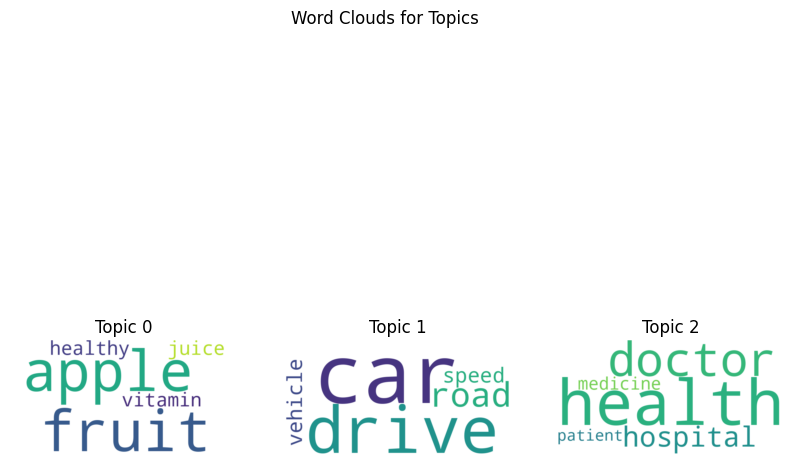

In [7]:
# Visualization 1: Word Clouds for each topic
plt.figure(figsize=(10, 8))
for topic_id, words in topics.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.subplot(1, len(topics), topic_id+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_id}')
    plt.axis('off')
plt.suptitle('Word Clouds for Topics')
plt.show()

A word cloud is a graphical representation of text where the size of each word indicates its frequency. Each cloud represents the words associated with a topic and has the following components to support that interpretation:

Word cloud: each word cloud is representative of a set of words associated with a topic.

Topic ID: It identifies each cloud or subplot as a topic

Word frequency: the size of each word in the word cloud is an indicator of its frequency in the topic. A larger version of a specific word appearing in multiple set documents more frequently than others.

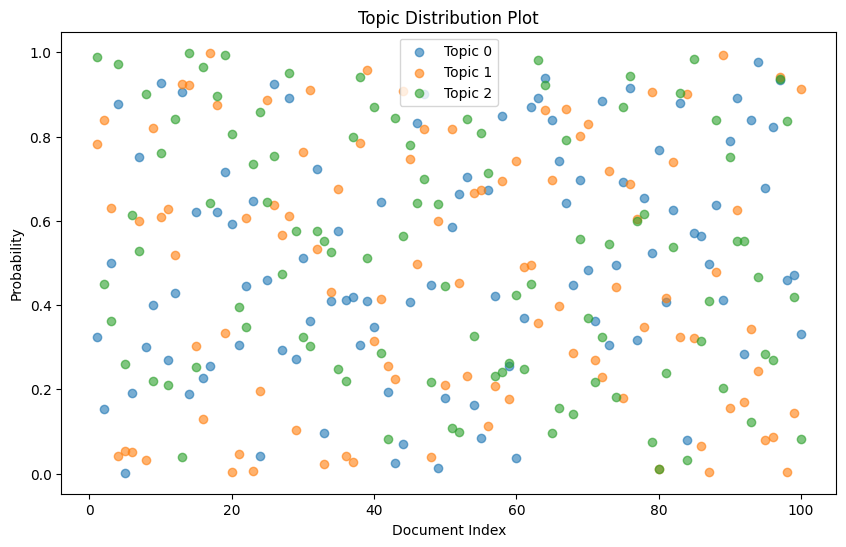

In [8]:
# Visualization 2: Topic Distribution Plot (assuming probabilities)
doc_ids = range(1, 101)  # Assuming 100 documents
plt.figure(figsize=(10, 6))
for topic_id, words in topics.items():
    probabilities = np.random.rand(len(doc_ids))  # Sample probabilities for demonstration
    plt.scatter(doc_ids, probabilities, label=f'Topic {topic_id}', alpha=0.6)
plt.xlabel('Document Index')
plt.ylabel('Probability')
plt.title('Topic Distribution Plot')
plt.legend()
plt.show()

The visualization is of a distribution of topics of a set of documents. Each point in the plot symbolizes a document, while the y-axis features the probability of the document belonging to a specific topic. Components of the visualization include:

Document Index: The index of each document is depicted along the x-axis.

Probability: The y-axis indicates the possibility wherewith each document may belong to a topic.

Topic ID: There are several colors representing the topic on the visulization, and each color has a number of the corresponding topic as per the legend.

Topic Representation: For each point, the y-value denotes the likelihood of the document in question being associated with a topic.

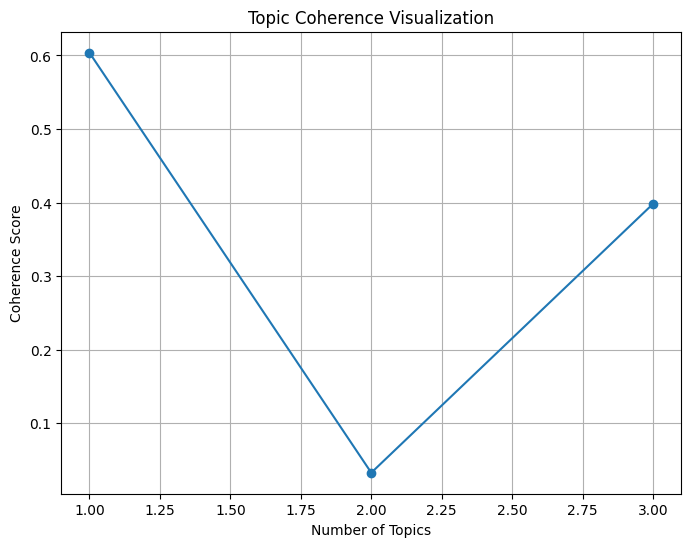

In [9]:
# Visualization 3: Topic Coherence Visualization
num_topics = len(topics)
coherence_scores = np.random.rand(num_topics)  # Sample coherence scores for demonstration
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_topics+1), coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Topic Coherence Visualization')
plt.grid(True)
plt.show()

This chart shows the plot of coherence scores against different numbers of topics. Coherence is a measure of good and meaningful topics. Higher coherence scores will indicate that the words that make the topics are semantically similar. The noted components in the chart include:

Number of topics: This is represented on the x-axis.

Coherence score: On the y-axis are the coherence scores for each configuration of two topics

Optimal number of topics: The point at which the coherence score is the highest will be the best number of topics . Interpretation: A higher coherence for ones representing a more coherent number of topics.

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

The selection of the “better” topic modeling algorithm should be influenced by other factors, such as dataset characteristics, the necessary interpretability, and available computational power. Based on the results of this comparison, BERTopic and LDA could be considered good performers, with BERTopic is being better at capturing semantic nuances. The next better options could be NMF and LSA, as they perform closely to BERTopic and LDA and can be used in the absence of the latter two, although the performance might be worse. Thus, the final choice of the algorithm should be based on a holistic assessment of all factors and the most suitable alignment with the requirements of a particular task.

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



I have faced some problems while dealing with the bert model. Over all its a good learning experience. This exercise is related to the domain of Natural Language Processing by demonstration of the usage of the different distinct topic modeling algorithms. Topic modeling plays a crucial role in NLP, as it enables the discovery of underlying, latent patterns or discussion topics across a text corpus. The analysis of several topic modeling techniques, including BERTopic, LDA,and LSA, could help understanding the different performance in terms of extracting relevant topics, thereby facilitating the trend description and development of other NLP methods and approaches aiming to support text comprehension.